<h2 style="color:green; text-align: center; font-size: 30px"> ⚾🏏 Salary Prediction Model With Regression 🏏⚾
</h2>

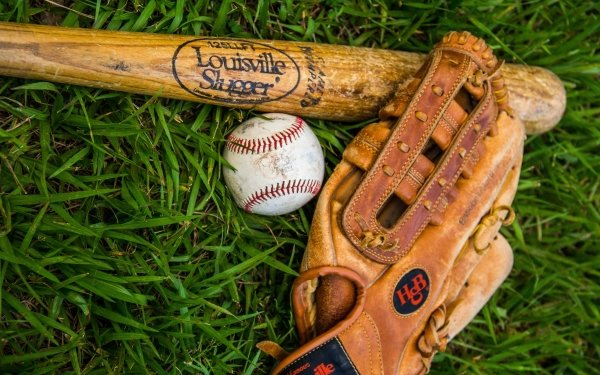

<h2 style="color:green; text-align: left; font-size: 20px"> Data Story
</h2>

<h2 style="color:brown; text-align: left; font-size: 15px"> This dataset was originally taken from the StatLib library at Carnegie Mellon University. The dataset is part of the data used in the 1988 ASA Graphics Division Poster Session. Salary data was originally taken from Sports Illustrated, April 20, 1987. 1986 and career statistics, Collier Books, Obtained from the 1987 Baseball Encyclopedia Update by Mac millan Publishing Company, New York
</h2>

<h2 style="color:green; text-align: left; font-size: 20px"> Data Variables;
</h2>

<h2 style="color:brown; text-align: left; font-size: 15px"> AtBat Number of times at bat in 1986
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> Hits Number of hits in 1986
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> HmRun Number of home runs in 1986
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> Runs Number of runs in 1986
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> RBI Number of runs batted in in 1986
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> Walks Number of walks in 1986
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> Years Number of years in the major leagues
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> CAtBat Number of times at bat during his career
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> CHits Number of hits during his career
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> CHmRun Number of home runs during his career
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> CRuns Number of runs during his career
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> CRBI Number of runs batted in during his career
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> CWalks Number of walks during his career
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> League A factor with levels A and N indicating player’s league at the end of 1986
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> Division A factor with levels E and W indicating player’s division at the end of 1986
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> PutOuts Number of put outs in 1986
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> Assists Number of assists in 1986
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> Errors Number of errors in 1986
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> Salary 1987 annual salary on opening day in thousands of dollars
</h2>
<h2 style="color:brown; text-align: left; font-size: 15px"> NewLeague A factor with levels A and N indicating player’s league at the beginning of 1987

</h2>

<h2 style="color:green; text-align: left; font-size: 20px">Business Problem ;
</h2>

<h2 style="color:brown; text-align: left; font-size: 15px"> Develop a machine learning model to estimate the salaries of baseball players whose salary information and career statistics for 1986 are shared.
</h2>

<h2 style="color:green; text-align: left; font-size: 20px"> Import Libraries
</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [2]:
df_ = pd.read_csv("../input/hitters/Hitters.csv")

In [3]:
df = df_.copy()

In [4]:
def data_review(dataframe):
    print("**********head**********")
    print(dataframe.head())
    print("**********isna**********")
    print(dataframe.isnull().sum())
    print("**********shape*********")
    print(dataframe.shape)
    print("*********info***********")
    print(dataframe.info())
    print("*********describe*******")
    print(dataframe.describe().T)
    print("*********nuniq*******")
    print(dataframe.nunique())

In [5]:
data_review(df)

**********head**********
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  
**********isna**********
A

<h2 style="color:green; text-align: left; font-size: 20px"> Numeric and Categorical variables
</h2>

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [7]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [8]:
cat_cols

['League', 'Division', 'NewLeague']

In [9]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

<h2 style="color:green; text-align: left; font-size: 20px"> Outlier Analysis and Solution
</h2>

In [10]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
    
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [11]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [13]:
df["Walks"].mean()

38.74223602484472

In [14]:
df["CHmRun"].mean()

69.49068322981367

<h2 style="color:green; text-align: left; font-size: 20px"> Creating New Variables
</h2>

In [15]:
df['Year_lab'] = pd.cut(x=df['Years'], bins=[0, 3, 6, 10, 15, 19, 24])
df.groupby(['League','Division', 'Year_lab']).agg({'Salary':'mean'})

Salary
League Division Year_lab            
A      E        (0, 3]    112.500000
                (3, 6]    655.568182
                (6, 10]   852.738125
                (10, 15]  816.311353
                (15, 19]  665.416750
                (19, 24]         NaN
       W        (0, 3]    153.613636
                (3, 6]    401.360000
                (6, 10]   633.958375
                (10, 15]  835.250000
                (15, 19]  479.000000
                (19, 24]  487.500000
N      E        (0, 3]    248.520813
                (3, 6]    501.191650
                (6, 10]   824.226143
                (10, 15]  894.322667
                (15, 19]  662.500000
                (19, 24]         NaN
       W        (0, 3]    191.766667
                (3, 6]    458.333333
                (6, 10]   563.229187
                (10, 15]  721.894000
                (15, 19]  760.833250
                (19, 24]  475.000000

<h2 style="color:green; text-align: left; font-size: 20px"> Missing Values
</h2>

In [16]:
df['Salary'] = df.groupby(['League', 'Division', 'Year_lab'])['Salary'].transform(lambda x: x.fillna(x.mean()))

In [17]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
Year_lab     0
dtype: int64

<h2 style="color:green; text-align: left; font-size: 20px"> EDA (Exploratory Data Analysis)
</h2>

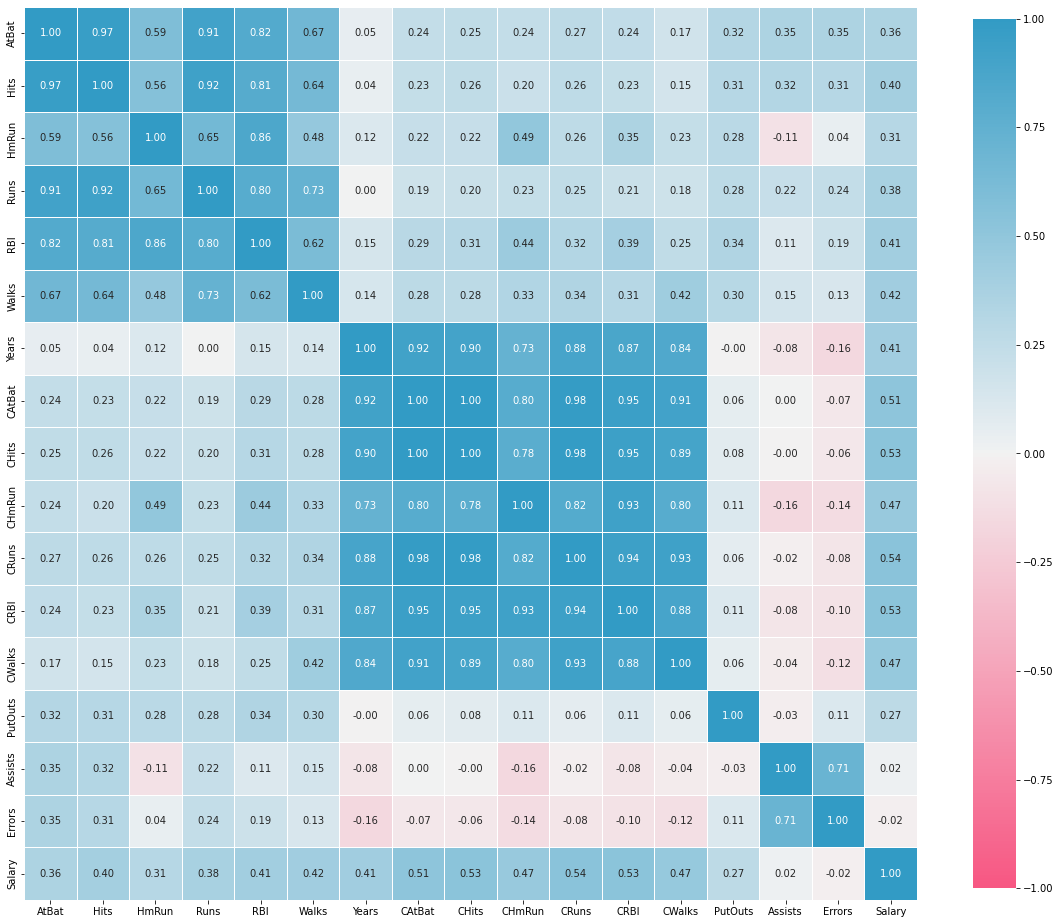

In [18]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1, cbar_kws={'shrink': .8}, square=True, annot=True, fmt='.2f',
            linewidths=.8)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


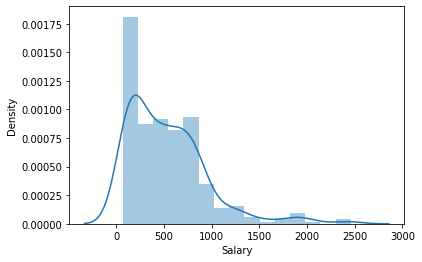

In [19]:
df["Salary"].describe()
sns.distplot(df.Salary)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


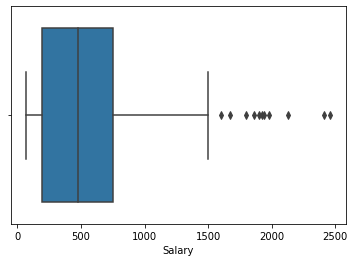

In [20]:
sns.boxplot(df["Salary"])
plt.show()

<h2 style="color:green; text-align: left; font-size: 20px"> Creating Model
</h2>

In [21]:
le = LabelEncoder()
df['League'] = le.fit_transform(df['League'])
df['Division'] = le.fit_transform(df['Division'])
df['NewLeague'] = le.fit_transform(df['NewLeague'])

In [22]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [23]:
df['Year_lab'] = le.fit_transform(df['Year_lab'])

In [24]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Year_lab
0,293,66,1,30,29,14,1,293,66,1,...,29,14,0,0,446,33,20,112.5,0,0
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,1,1,632,43,10,475.0,1,3
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,0,1,880,82,14,480.0,0,0
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,1,0,200,11,3,500.0,1,3
4,321,87,10,39,42,30,2,396,101,12,...,46,33,1,0,805,40,4,91.5,1,0


In [25]:
data = df.drop(["Salary","League", "NewLeague","Division","Year_lab"], axis=1)

In [26]:
for col in data:
    df[col] = RobustScaler().fit_transform(df[[col]])

In [27]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Year_lab
0,-0.336904,-0.410959,-0.583333,-0.464516,-0.408163,-0.677419,-0.714286,-0.526146,-0.519847,-0.480263,...,-0.567407,-0.575368,0,0,1.084589,-0.040881,1.750,112.5,0,0
1,-0.251217,-0.205479,-0.083333,-0.619355,-0.163265,0.129032,1.142857,0.489461,0.384593,0.414474,...,0.573333,0.751838,1,1,1.946698,0.022013,0.500,475.0,1,3
2,0.387537,0.465753,0.833333,0.464516,0.761905,1.322581,-0.428571,-0.097828,-0.059982,0.335526,...,0.134815,0.340074,0,1,3.096176,0.267296,1.000,480.0,0,0
3,0.453749,0.616438,1.000000,0.438710,0.925170,0.064516,0.714286,1.190668,1.254925,2.467105,...,1.829630,0.674632,1,0,-0.055620,-0.179245,-0.375,500.0,1,3
4,-0.227848,-0.123288,0.166667,-0.232258,-0.054422,-0.161290,-0.571429,-0.493001,-0.478683,-0.335526,...,-0.517037,-0.505515,1,0,2.748552,0.003145,-0.250,91.5,1,0


In [28]:
y=df["Salary"]
X=df.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_linreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_linreg_rmse

308.8623753197254

<h2 style="color:green; text-align: left; font-size: 20px"> Train error is higher than test error.
If it's the other way around, it would be a great scenario.

</h2>

In [29]:
y_pred = model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

294.70341272904807

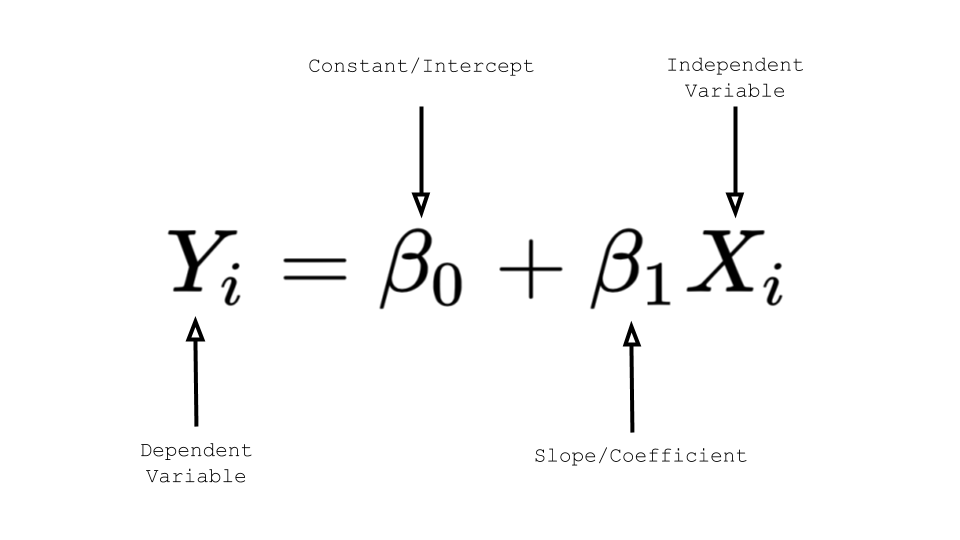

<h2 style="color:green; text-align: left; font-size: 20px"> Bias Values
</h2>

In [30]:
linreg.intercept_

98.19143192808463

<h2 style="color:green; text-align: left; font-size: 20px"> Weight Value
</h2>

In [31]:
linreg.coef_

array([-6.05061944e+02,  4.90822537e+02,  3.67858226e+01, -5.72522169e+01,
       -6.32969806e-01,  1.99406385e+02, -4.76489290e+02, -6.05516479e+02,
        1.71616459e+02, -5.30844639e+01,  6.42713056e+02,  3.01635138e+02,
       -2.17673141e+02, -1.39802189e+01, -1.12548750e+02,  5.32339759e+01,
        7.15535845e+01, -1.86852544e+01, -2.93081795e+00,  2.69685321e+02])

In [32]:
df_linreg_rmse

308.8623753197254

<h2 style="color:green; text-align: left; font-size: 20px"> 10 Fold Cross-validation

</h2>



In [33]:
np.mean(np.sqrt(-cross_val_score(model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

317.7977574801422